<a href="https://colab.research.google.com/github/Fairly-fire/Python-and-Machine-Learning/blob/main/House_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
from scipy.stats import ttest_ind

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Project_2__HousePrice.csv to Project_2__HousePrice.csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['Project_2__HousePrice.csv']))

Import and Study Dataset

In [ ]:
df[df.chas==1].medv.mean()

23.979310344827585

In [ ]:
ttest_ind(df[df.chas==1].medv, df[df.chas==0].medv,equal_var=True)

Ttest_indResult(statistic=1.6571053443179937, pvalue=0.09814089320087695)

In [ ]:
df

,crim,zn,indus,chas,nox,rm,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,6.0622,3,222,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...
485,0.06263,0.0,11.93,0,0.573,6.593,2.4786,1,273,21.0,9.67,22.4
486,0.04527,0.0,11.93,0,0.573,6.120,2.2875,1,273,21.0,9.08,20.6
487,0.06076,0.0,11.93,0,0.573,6.976,2.1675,1,273,21.0,5.64,23.9
488,0.10959,0.0,11.93,0,0.573,6.794,2.3889,1,273,21.0,6.48,22.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 490 entries, 0 to 489
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     490 non-null    float64
 1   zn       490 non-null    float64
 2   indus    490 non-null    float64
 3   chas     490 non-null    int64  
 4   nox      490 non-null    float64
 5   rm       490 non-null    float64
 6   dis      490 non-null    float64
 7   rad      490 non-null    int64  
 8   tax      490 non-null    int64  
 9   ptratio  490 non-null    float64
 10  lstat    490 non-null    float64
 11  medv     490 non-null    float64
dtypes: float64(9), int64(3)
memory usage: 46.1 KB


Exploratory Data Analysis

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
crim,490.0,3.643241,8.722154,0.00632,0.082045,0.24751,3.647423,88.9762
zn,490.0,11.112245,22.844626,0.00000,0.000000,0.00000,12.500000,100.0000
indus,490.0,11.113143,6.821302,0.74000,5.190000,9.69000,18.100000,27.7400
chas,490.0,0.059184,0.236209,0.00000,0.000000,0.00000,0.000000,1.0000
nox,490.0,0.554307,0.116688,0.38500,0.449000,0.53800,0.624000,0.8710
rm,490.0,6.245471,0.653147,3.56100,5.881000,6.18500,6.578000,8.7800
dis,490.0,3.834519,2.109948,1.13700,2.111050,3.27590,5.214600,12.1265
rad,490.0,9.514286,8.691297,1.00000,4.000000,5.00000,24.000000,24.0000
tax,490.0,408.002041,168.065190,187.00000,280.250000,330.00000,666.000000,711.0000
ptratio,490.0,18.520000,2.110478,12.60000,17.400000,19.10000,20.200000,22.0000


In [ ]:
df.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'dis', 'rad', 'tax',
       'ptratio', 'lstat', 'medv'],
      dtype='object')

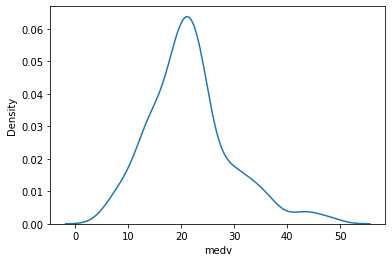

In [ ]:
sns.kdeplot(df.medv)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


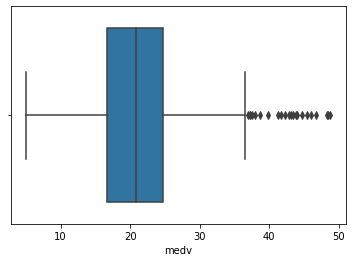

In [ ]:
sns.boxplot(df.medv)

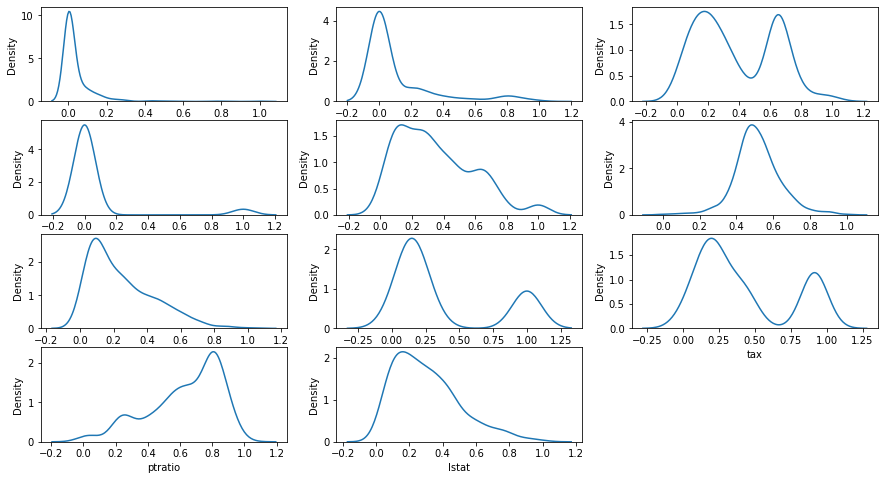

In [ ]:
plt.figure(figsize=(15,8))
count =1
for i in np.arange(0,len(df.columns)-1):
  plt.subplot(4,3,count)
  sns.kdeplot(df.iloc[:,i])
  count = count +1

In [ ]:
df.corr()

,crim,zn,indus,chas,nox,rm,dis,rad,tax,ptratio,lstat,medv
crim,1.000000,-0.199075,0.408053,-0.064210,0.420476,-0.219307,-0.382231,0.627434,0.583711,0.287079,0.461755,-0.450115
zn,-0.199075,1.000000,-0.527121,-0.053911,-0.512137,0.310506,0.673227,-0.307726,-0.302897,-0.381815,-0.422090,0.404608
indus,0.408053,-0.527121,1.000000,0.035815,0.765155,-0.412413,-0.710284,0.596124,0.717678,0.387656,0.636527,-0.600005
chas,-0.064210,-0.053911,0.035815,1.000000,0.085619,0.044979,-0.077705,-0.032786,-0.067743,-0.116830,-0.006486,0.074803
nox,0.420476,-0.512137,0.765155,0.085619,1.000000,-0.322609,-0.768122,0.612160,0.667380,0.188381,0.612444,-0.524451
rm,-0.219307,0.310506,-0.412413,0.044979,-0.322609,1.000000,0.245789,-0.195768,-0.281955,-0.293299,-0.610369,0.686634
dis,-0.382231,0.673227,-0.710284,-0.077705,-0.768122,0.245789,1.000000,-0.491875,-0.532025,-0.246773,-0.536493,0.368813
rad,0.627434,-0.307726,0.596124,-0.032786,0.612160,-0.195768,-0.491875,1.000000,0.909000,0.456035,0.510192,-0.476296
tax,0.583711,-0.302897,0.717678,-0.067743,0.667380,-0.281955,-0.532025,0.909000,1.000000,0.452252,0.566467,-0.572442
ptratio,0.287079,-0.381815,0.387656,-0.116830,0.188381,-0.293299,-0.246773,0.456035,0.452252,1.000000,0.358023,-0.518641


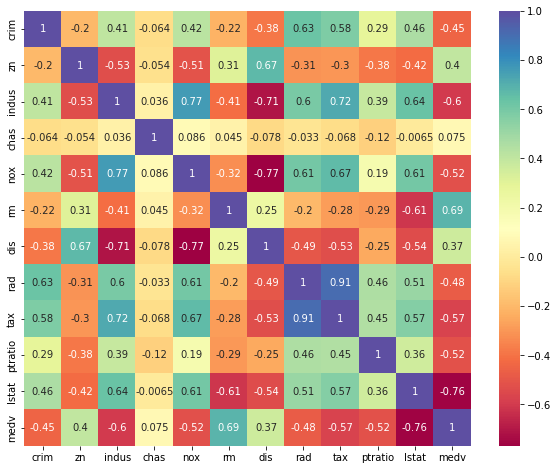

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='Spectral')


MULTIPLE LINEAR REGRESSION

In [ ]:
X = df.drop('medv', axis =1)
y = df.medv
X2 = sm.add_constant(X)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
lm1 = sm.OLS(y, X2).fit()
print(lm1.summary())
#as we can see from the p-values "indus" and "chas" are not significant. Hence we create a new model without these columns.

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     145.0
Date:                Fri, 22 Apr 2022   Prob (F-statistic):          1.62e-144
Time:                        23:35:17   Log-Likelihood:                -1345.9
No. Observations:                 490   AIC:                             2716.
Df Residuals:                     478   BIC:                             2766.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         37.2868      3.999      9.325      0.0

In [ ]:
formula = 'medv ~ crim + zn + nox + rm + dis + rad + tax + ptratio + lstat'
lm2 = smf.ols(formula=formula, data=df).fit()
print(lm2.summary())
#Here we can see all the columns are significant. Now let's scale the values to increase the R^2 value.

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     177.3
Date:                Fri, 22 Apr 2022   Prob (F-statistic):          1.75e-146
Time:                        23:35:25   Log-Likelihood:                -1346.6
No. Observations:                 490   AIC:                             2713.
Df Residuals:                     480   BIC:                             2755.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     37.6032      3.986      9.434      0.0

In [ ]:
formula = 'medv ~ rm + ptratio + lstat'
lm3 = smf.ols(formula=formula, data=df).fit()
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.713
Model:                            OLS   Adj. R-squared:                  0.711
Method:                 Least Squares   F-statistic:                     401.7
Date:                Fri, 22 Apr 2022   Prob (F-statistic):          3.79e-131
Time:                        23:35:34   Log-Likelihood:                -1399.9
No. Observations:                 490   AIC:                             2808.
Df Residuals:                     486   BIC:                             2825.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     21.5589      3.247      6.639      0.0

In [ ]:
pred = lm2.predict(df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


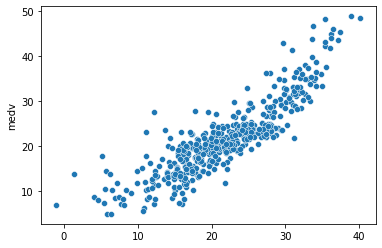

In [ ]:
sns.scatterplot(pred, df.medv)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


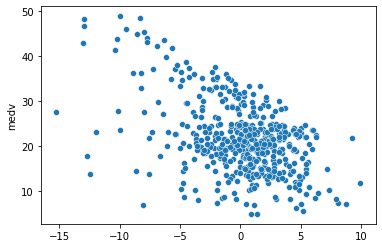

In [ ]:
sns.scatterplot(pred-df.medv , df.medv)

SCALED MODEL

In [ ]:
def scale(data):
  dataout = (data- data.min())/(data.max()-data.min())
  return dataout

In [ ]:
for i in df.columns:
  df[i] = scale(df[i])

In [ ]:
df.describe()

,crim,zn,indus,chas,nox,rm,dis,rad,tax,ptratio,lstat,medv
count,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000
mean,0.040878,0.111122,0.384190,0.059184,0.348369,0.514365,0.245463,0.370186,0.421760,0.629787,0.304085,0.379815
std,0.098035,0.228446,0.252641,0.236209,0.240098,0.125148,0.191997,0.377882,0.320735,0.224519,0.196810,0.179573
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000851,0.000000,0.164815,0.000000,0.131687,0.444530,0.088635,0.130435,0.177958,0.510638,0.149139,0.267123
50%,0.002711,0.000000,0.331481,0.000000,0.314815,0.502778,0.194631,0.173913,0.272901,0.691489,0.269380,0.363014
75%,0.040925,0.125000,0.642963,0.000000,0.491770,0.578080,0.371045,1.000000,0.914122,0.808511,0.420603,0.449201
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
formula = 'medv ~ crim + zn + nox + rm + dis + rad + tax + ptratio + lstat+ indus + chas'
lm = smf.ols(formula=formula, data=df).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     145.0
Date:                Fri, 22 Apr 2022   Prob (F-statistic):          1.62e-144
Time:                        23:36:14   Log-Likelihood:                 506.09
No. Observations:                 490   AIC:                            -988.2
Df Residuals:                     478   BIC:                            -937.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5431      0.037     14.510      0.0

In [ ]:
formula = 'medv ~ crim + zn + nox + rm + dis + rad + tax + ptratio + lstat'
lm = smf.ols(formula=formula, data=df).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     177.3
Date:                Fri, 22 Apr 2022   Prob (F-statistic):          1.75e-146
Time:                        23:36:21   Log-Likelihood:                 505.42
No. Observations:                 490   AIC:                            -990.8
Df Residuals:                     480   BIC:                            -948.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5380      0.037     14.619      0.0

In [ ]:
lm.params.abs().sort_values()
# we can see that rooms has the highest effect on price and residential zones has the least

zn           0.089308
rad          0.137338
nox          0.172322
ptratio      0.185143
tax          0.186540
crim         0.239221
dis          0.276054
lstat        0.334317
rm           0.419029
Intercept    0.538025
dtype: float64

In [ ]:
#The End